In [18]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

cluster1 = [np.random.normal(1,1, 10), np.random.normal(5, 1, 10)]
cluster2 = [np.random.normal(5,1, 10), np.random.normal(2, 1, 10)]
cluster3 = [np.random.normal(10,1, 10), np.random.normal(-2, 1, 10)]
cluster4 = [np.random.normal(-1,1, 10), np.random.normal(15, 1, 10)]
X = np.hstack((cluster1, cluster2, cluster3, cluster4)).T


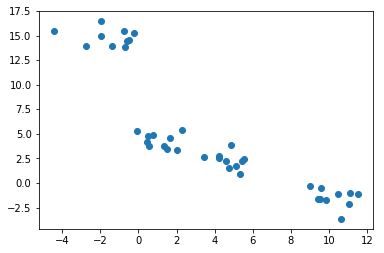

In [19]:
plt.scatter(X[:, 0], X[: ,1])
plt.show()

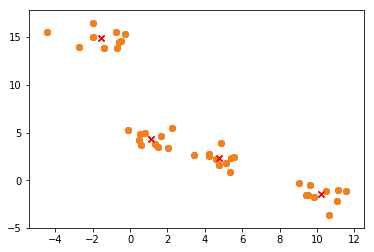

In [22]:
k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(X)

plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='r', marker='x')
plt.show()

In [23]:
def  meanDistortion(X, c):
    '''
    return the average distance of each datapoint to its nearest cluster's center
    '''
    cd = cdist(X, c, 'euclidean')
    return np.sum(np.min(cd, axis=1)) / X.shape[0]

meanDistortion(X, kmeans.cluster_centers_)

1.0653882097910947

In [25]:
# run K-means multiple times, each with different K
# store the mean distortion at teach iteration
Ks = range(1, 30)
meandistortions = []
for k in Ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    meandistortions.append(meanDistortion(X, kmeans.cluster_centers_))

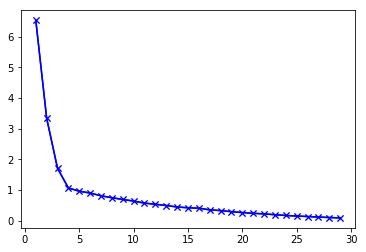

In [27]:
plt.plot(K, meandistortions, 'bx-')
plt.show()
# can you see the elbow there?

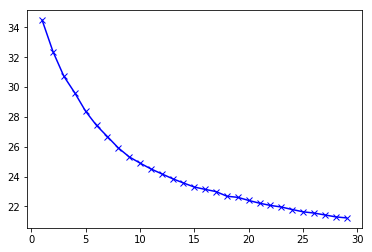

In [31]:
# Try with digit data
from sklearn import datasets
digits = datasets.load_digits()
digits_X = digits.data
Ks = range(1, 30)
meandistortions = []
for k in Ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(digits_X)
    meandistortions.append(meanDistortion(digits_X, kmeans.cluster_centers_))
    
plt.plot(K, meandistortions, 'bx-')
plt.show()